Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans fl

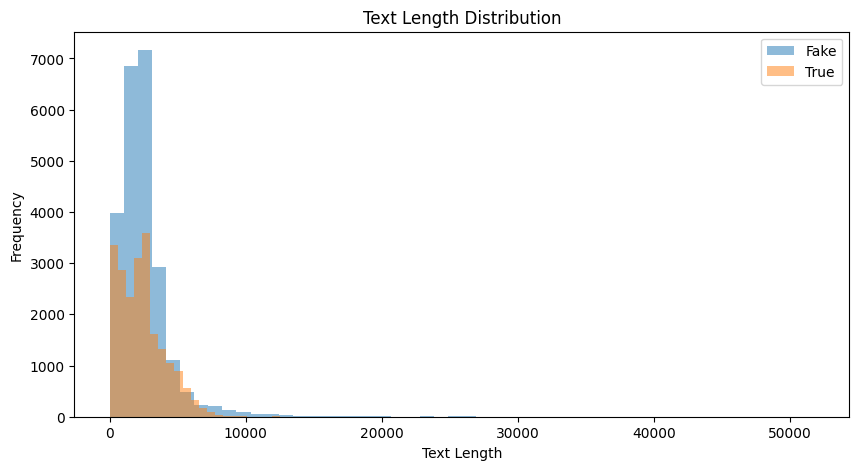

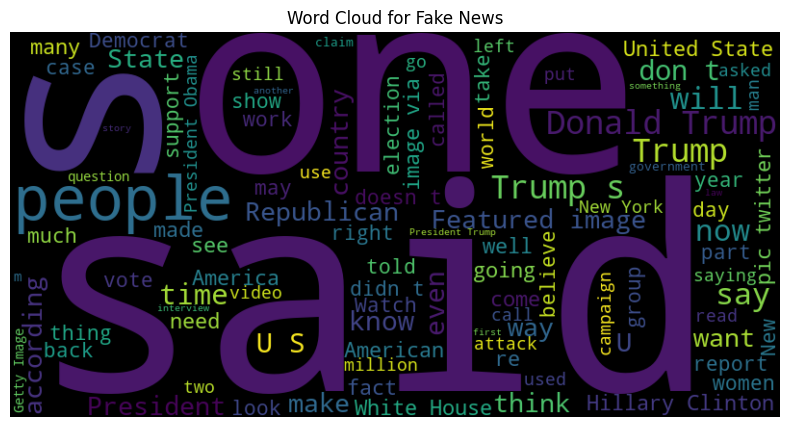

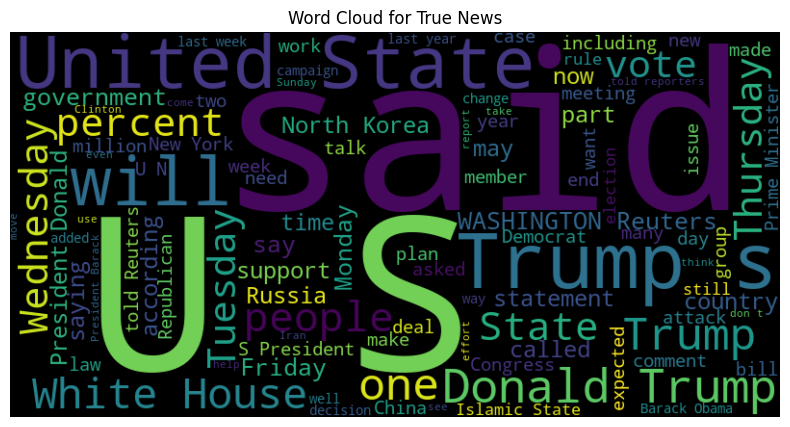


Top 10 words in Fake News: [('the', 483203), ('to', 286028), ('of', 233193), ('and', 213059), ('a', 202870), ('in', 152840), ('that', 138416), ('s', 127621), ('is', 105555), ('for', 88389)]

Top 10 words in True News: [('the', 422622), ('to', 243787), ('of', 204339), ('a', 187214), ('and', 179411), ('in', 169538), ('on', 104807), ('that', 82512), ('for', 77867), ('said', 72025)]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load datasets
fake = pd.read_csv('../data/raw/fake.csv')
true = pd.read_csv('../data/raw/true.csv')

# Basic info
print("Fake News Dataset:")
print(fake.head())
print("\nTrue News Dataset:")
print(true.head())
print("\nSubject Distribution in Fake News:")
print(fake['subject'].value_counts())
print("\nSubject Distribution in True News:")
print(true['subject'].value_counts())

# Text length analysis
fake['text_length'] = fake['text'].apply(len)
true['text_length'] = true['text'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(fake['text_length'], bins=50, alpha=0.5, label='Fake')
plt.hist(true['text_length'], bins=50, alpha=0.5, label='True')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('../reports/figures/text_length_distribution.png')
plt.show()

# Word cloud for fake news
fake_text = ' '.join(fake['text'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.savefig('../reports/figures/fake_wordcloud.png')
plt.show()

# Word cloud for true news
true_text = ' '.join(true['text'].dropna())
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(true_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')
plt.savefig('../reports/figures/true_wordcloud.png')
plt.show()

# Most common words
fake_words = ' '.join(fake['text'].dropna()).split()
true_words = ' '.join(true['text'].dropna()).split()
fake_word_counts = Counter(fake_words).most_common(10)
true_word_counts = Counter(true_words).most_common(10)
print("\nTop 10 words in Fake News:", fake_word_counts)
print("\nTop 10 words in True News:", true_word_counts)